In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Clear training data set
# !rm -rf musical_instruments

# Download training data set after image scraping
# !zip -r /content/musical_instruments.zip musical_instruments

# Unzip the file in Google Drive and place it in Google Colab environment
# !unzip -q "/content/drive/MyDrive/@SELF-STUDY/@CV PROJECTS/0 Musical Instrument Classifier (Computer Vision - ML)/musical_instruments.zip" -d "/content/"

Streaming output truncated to the last 5000 lines.
  adding: musical_instruments/nylon_guitar/d471cea7-a3e3-4bef-9dfc-4d31e3f6eb8f.jpg (deflated 1%)
  adding: musical_instruments/nylon_guitar/7044eb4c-7694-450f-a5f2-54be83932eb5.jpg (deflated 3%)
  adding: musical_instruments/nylon_guitar/ed4d8e87-910b-48f2-8866-e2820389c106.jpg (deflated 31%)
  adding: musical_instruments/nylon_guitar/42d84cda-a12a-4401-8bee-2652308208d4.jpg (deflated 5%)
  adding: musical_instruments/nylon_guitar/cdbebf3d-65ab-4f75-b236-639480e6994c.jpeg (deflated 7%)
  adding: musical_instruments/nylon_guitar/2aeba7b2-0d05-4b06-8bf8-bab0bf633e50.jpg (deflated 23%)
  adding: musical_instruments/nylon_guitar/9507871b-1ef9-46a6-a421-26e2ea606ad1.JPG (deflated 1%)
  adding: musical_instruments/nylon_guitar/c14c1904-f040-4e9d-a648-237ccd09aa90.jpg (deflated 1%)
  adding: musical_instruments/nylon_guitar/7a06d492-2c12-4c10-afc7-85e96f93fae7.webp (deflated 2%)
  adding: musical_instruments/nylon_guitar/837f7aaa-2ee2-4b19-b

In [ ]:
# Dependency installation
!pip install -Uqq duckduckgo_search tqdm timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 111.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21

---
# Musical Instrument Classifier (MIC) Model Training
---

**TL;DR:** The model maintained `~68.44%` accuracy across 54 instrument types with minimal confusion. This is due to the general dataset used in training the model. Curating qualities specific to each instrument is highly recommended.

---

**Notes:**
*   The **Musical Instrument Classifier (MIC)** is a computer vision and machine learning model designed to recognize a wide variety of commonly used musical instruments based on image input.
*   Used `DuckDuckGo` API to gather commonly used instrument images, such as:
  * **Stringed instruments**
      * `steel string guitar, nylon guitar, electric guitar, acoustic bass guitar, electric bass guitar, violin, viola, cello, double bass, harp, ukelele, banjo, mandolin`
  * **Keyboard instruments**
      * `grand piano, electric keyboard, synthesizer, organ, accordion`
  * **Brass instruments**
      * `trumpet, trombone, french horn, tuba, euphonium`
  * **Woodwind Instruments**
      * `flute, clarinet, saxophone, oboe, bassoon, piccolo`
  * **Percussion Instruments**
      * `acoustic drum set, electric drum set, snare drum, bass drum, kick drum, crash cymbal, ride cymbal, splash cymbal, zill cymbal, tom, floor tom, hi-hat, tambourine, bongo drums, congas, xylophone, marimba, triangle`
  * **Miscellaneous instruments**
      * `microphone, DJ controller, theremin, electric violin, keytar, multiple-necked guitar, otamatone`
*   `fast.ai` API for learning and differentiating the instruments.
*   Provided a trained model: `musical_instrument_classifier.pkl`.
  * Based on the pre-trained `resnet152` CNN model.
  * The training data currently involves about `1000 samples` for each listed instrument. The model is fine-tuned `10 times`.
  * Model performance:
      * **Training loss factor ≈** `0.4146`
      * **Validation loss factor ≈** `1.4144`
      * **Error rate ≈** `31.56%`
      * **Normalized Confusion Matrix Plot**
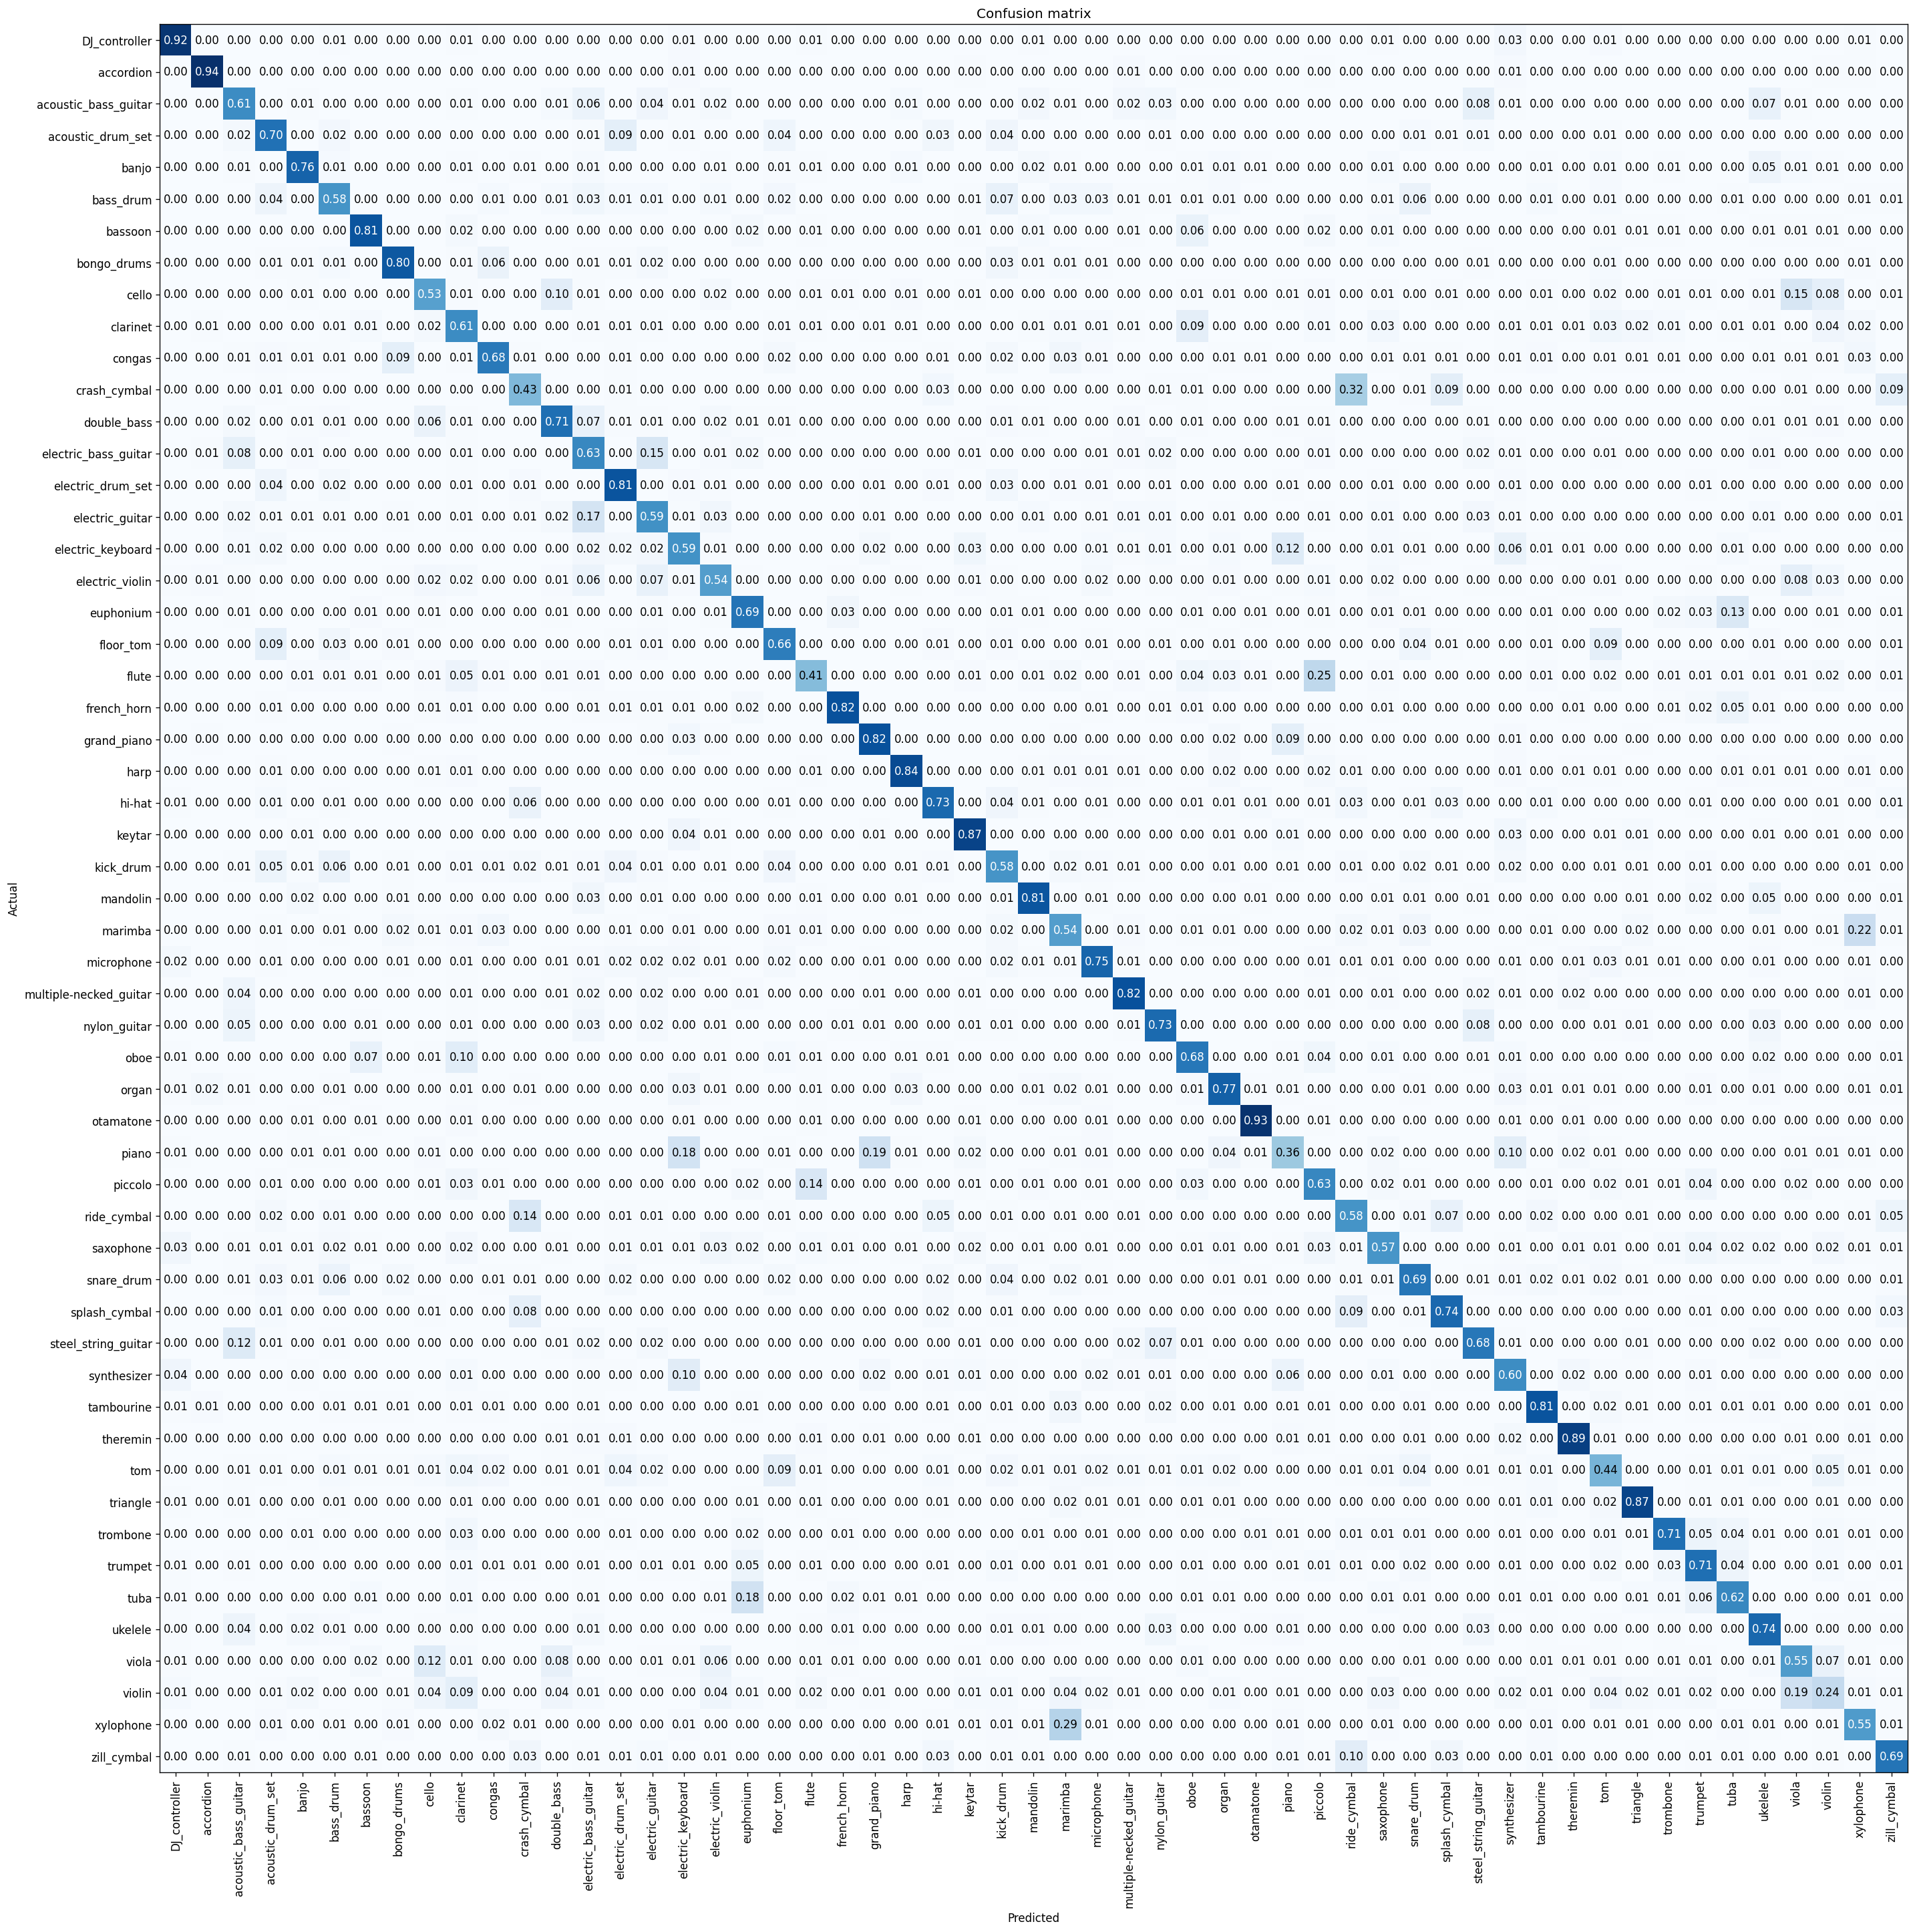
---
***Note:*** The model performs well across a wide range of musical instruments, but identifying unconventional or unlisted instruments may lead to inconsistent results. To improve reliability, it is recommended to expand the training dataset strategically by providing special queries highlighting the qualities specific to each instrument.

The normalized confusion matrix shows a clear diagonal pattern, indicating accurate predictions across most classes. Some mild confusion occurred between similar-looking instruments — such as `splash cymbal vs. ride cymbal`, and `violin vs. viola` — which is expected given their visual resemblance in photos.

---

In [ ]:
from duckduckgo_search import DDGS # DuckDuckGo has changed the API so we need to update
from fastcore.all import *

image_count = 1000

def search_images(keywords, max_images=image_count): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

In [ ]:
from re import search
from fastdownload import download_url
from fastai.vision.all import *

# Save each group of instrument photos to a different folder; add more instrument categories as needed.
# Each instrument category includes about 1000 images forr model training.
instrument = {
    'stringed': ['steel_string_guitar', 'nylon_guitar', 'electric_guitar', 'acoustic_bass_guitar', 'electric_bass_guitar', 'violin', 'viola', 'cello', 'double_bass', 'harp', 'ukelele', 'banjo', 'mandolin'],
    'keyboard': ['grand_piano', 'electric_keyboard', 'synthesizer', 'organ', 'accordion'],
    'brass': ['trumpet', 'trombone', 'french_horn', 'tuba', 'euphonium'],
    'woodwind': ['flute', 'clarinet', 'saxophone', 'oboe', 'bassoon', 'piccolo'],
    'percussion': ['acoustic_drum_set', 'electric_drum_set', 'snare_drum', 'bass_drum', 'kick_drum', 'crash_cymbal', 'ride_cymbal', 'splash_cymbal', 'zill_cymbal', 'tom', 'floor_tom', 'hi-hat', 'tambourine', 'bongo_drums', 'congas', 'xylophone', 'marimba', 'triangle'],
    'misc': ['microphone', 'DJ_controller', 'theremin', 'electric_violin', 'keytar', 'multiple-necked_guitar', 'otamatone']
}

path = Path('musical_instruments')

In [ ]:
import random
import PIL
import hashlib
from tqdm import tqdm
import time

# Function for image search and extraction using DuckDuckGo
def ddg_extract(instrument):
    print(f"--------------------")
    print(f"Image Extraction Log")
    print(f"--------------------")
    for name in instrument:
        queries = [                     # Input more queries to diversify data gathered
            f"{name} instrument photo",
            f"{name} musical instrument",
            f"{name} player with instrument",
            f"{name} instrument for sale",
            f"{name} instrument new",
            f"{name} instrument used",
            f"{name} sample instrument picture",
            f"{name} musical instrument drawing",
            f"{name} musical instrument doodle",
            f"{name} HD image",
            f"{name} isolated",
            f"{name} on stage",
        ]
        dest = (path/name)
        dest.mkdir(parents=True, exist_ok=True)

        # Clean existing folder before counting (interrupted runtime/session precaution)
        for f in dest.iterdir():
            if f.suffix.lower() in ['.heic', '.avif']:
                f.unlink()
            else:
                try:
                    img = PIL.Image.open(f)
                    img.verify()
                except Exception as e:
                    f.unlink()

        # Remove exact duplicate images in all existing class folders
        for class_folder in path.ls():
            if class_folder.is_dir():
                hashes = {}
                for f in class_folder.glob('*'):
                    if f.is_file():
                        try:
                            with open(f, 'rb') as img_file:
                                h = hashlib.md5(img_file.read()).hexdigest()
                            if h in hashes:
                                f.unlink()
                            else:
                                hashes[h] = f
                        except Exception as e:
                            print(f"Error hashing {f.name}: {e}")

        # Skip if already has 200 or more images
        existing_imgs = list(dest.glob('*'))
        for q in tqdm(queries, desc=f"\nSearching for '{name}' images", leave=False):
            if len(existing_imgs) >= image_count*0.9:
                print(f"\nDone with {name}. Reached {len(existing_imgs)} images for training.")
                continue

            # Impose a time limit to maximize search query
            query_start_time = time.time()
            time_limit = 10  # seconds to spend per query

            try:
                max_attempts = 3
                attempts = 0
                while len(existing_imgs) < image_count and attempts < max_attempts: # Stop when the desired image count is reached

                    if time.time() - query_start_time > time_limit:
                        print(f"\nTime limit reached for query: {q}")
                        break  # Proceed to next query

                    # Remove problematic image files first
                    for f in (path/name).ls():
                        if f.suffix.lower() in ['.heic', '.avif']:
                          f.unlink()  # Delete .heic and .avif images as Pillow (PIL) does not support it by default
                        try:
                            img = PIL.Image.open(f)
                            img.load()    # Forces actual image decoding
                            img.verify()  # Sanity check
                            if img.mode == 'P':
                                img = img.convert('RGBA')
                            img.save(f)  # Overwrite the converted image
                        except Exception as e: # Remove corrupted or unreadable file
                          f.unlink()

                    # Remove duplicate images
                    hashes = {}
                    for f in dest.glob('*'):
                        if f.is_file():
                            try:
                                with open(f, 'rb') as img_file:
                                    h = hashlib.md5(img_file.read()).hexdigest()
                                if h in hashes:
                                    f.unlink()
                                else:
                                    hashes[h] = f
                            except Exception as e:
                                print(f"Error hashing {f.name}: {e}")

                    existing_imgs = list(dest.glob('*'))
                    remaining = image_count - len(existing_imgs)

                    if remaining == 0 and attempts == max_attempts:
                        print(f"Downloaded {len(existing_imgs)} total images for: {name}.")
                        break

                    urls = search_images(q, max_images = remaining)
                    download_images(dest, urls=urls)
                    attempts += 1
                    print(f"\n{name}: {len(existing_imgs)}/{image_count} images gathered. {max_attempts - attempts} attempts left.")

            except Exception as e:
                print(f"Error downloading {name}: {e}")
                print(f"Downloaded {len(existing_imgs)} images for: {name}.")
                continue  # Proceed until the desired image count is satisfied

        time.sleep(random.uniform(8, 12))

        resize_images(path/name, max_size=400, dest=path/name)

In [ ]:
# Image File Gathering
# Call the function separately for each class to avoid rate limits.
ddg_extract(instrument['stringed'])
ddg_extract(instrument['keyboard'])
ddg_extract(instrument['brass'])
ddg_extract(instrument['woodwind'])
ddg_extract(instrument['percussion'])
ddg_extract(instrument['misc'])

In [ ]:
# Further cleaning of images
from pathlib import Path
from PIL import Image
import hashlib

dataset_root = Path('musical_instruments')  # Change as needed

unsupported_exts = ['.heic', '.avif']
deleted_files = []

def is_image_valid(f):
    try:
        with Image.open(f) as img:
            img.verify()
        return True
    except Exception:
        return False

def clean_dataset(path):
    print(f"Cleaning corrupted or unsupported files in: {path}")
    for f in path.rglob('*'):
        if f.is_file():
            if f.suffix.lower() in unsupported_exts:
                print(f"[Unsupported] {f}")
                f.unlink()
                deleted_files.append(f)
            elif not is_image_valid(f):
                print(f"[Corrupted] {f}")
                f.unlink()
                deleted_files.append(f)

def remove_duplicates(path):
    print(f"Removing duplicates in: {path}")
    hashes = {}
    for f in path.rglob('*'):
        if f.is_file():
            try:
                with open(f, 'rb') as img_file:
                    h = hashlib.md5(img_file.read()).hexdigest()
                if h in hashes:
                    print(f"[Duplicate] {f}")
                    f.unlink()
                    deleted_files.append(f)
                else:
                    hashes[h] = f
            except Exception as e:
                print(f"Skipping hash for: {f.name} — {e}")

clean_dataset(dataset_root)
remove_duplicates(dataset_root)

print(f"Cleanup complete. Total files deleted: {len(deleted_files)}")

Cleaning corrupted or unsupported files in: musical_instruments


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


[Corrupted] musical_instruments/triangle/b02dd519-74d4-4ea7-abc2-df8bcf111c1e.jpg
[Corrupted] musical_instruments/triangle/3fc8b5bc-279e-4aa3-b89c-4db28a56dc5a.jpg
[Corrupted] musical_instruments/triangle/16362fa4-fec0-4eac-a8e6-dc02e133bba7.jpg
[Corrupted] musical_instruments/triangle/a1aab72d-2988-4a75-a827-0e816a63cbcf.jpg
[Corrupted] musical_instruments/triangle/2d7cb044-0d23-4383-a77f-26d3eaea6fbb.jpg
[Corrupted] musical_instruments/triangle/62f0e004-4cea-4b45-bafa-2727718a54cf.jpg
[Corrupted] musical_instruments/triangle/a2d13ee8-9890-4835-b096-dfa11f8b823a.jpg
[Corrupted] musical_instruments/marimba/62cd3fc0-8c6b-49a2-96f8-ee7b9b74c6c1.jpg
[Corrupted] musical_instruments/marimba/9605071e-0b02-457c-aa0c-94699cb849b4.jpg
[Corrupted] musical_instruments/marimba/7812f827-8ffe-4b1c-8fd8-ede8a79a9846.jpg
[Corrupted] musical_instruments/DJ_controller/678caf52-3fbb-4ec7-ad0f-a38d82002f92.png
[Corrupted] musical_instruments/DJ_controller/9d301b43-5927-46fe-a891-81cd30de9596.jpg
[Corrupte

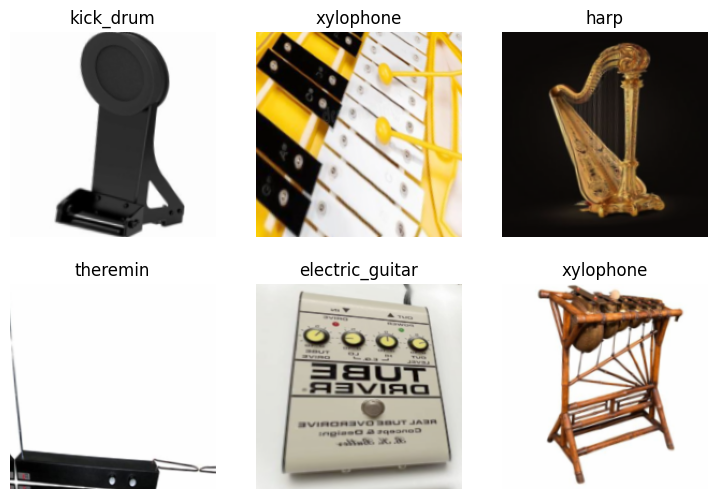

In [ ]:
# To train a model, we'll need DataLoaders, which is an object that contains a training set
# (the images used to create a model) and a validation set (the images used to check the
# accuracy of a model -- not used during training). In fastai, we can create that easily
# using a DataBlock, and view sample images from it.

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),              # The inputs to our model are images, and the outputs are categories
    get_items=get_image_files,                       # To find all the inputs to our model, run the get_image_files function (which returns a list of all image files in a path).
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # Split the data into training and validation sets randomly, using 20% of the data for the validation set.
    get_y=parent_label,                              # The labels (y values) is the name of the parent of each file
    item_tfms=Resize(192, method='squish'),          # Before training, resize each image to 192x192 pixels by "squishing" it (as opposed to cropping it).
    batch_tfms=aug_transforms(                       # Apply batch-wise augmentation
        mult=1.0,          # Increase factor for stronger transforms as needed
        max_rotate=10,     # Slight rotation
        max_zoom=1.1,      # Slight zoom
        max_lighting=0.2,  # Lighting changes
        max_warp=0.2,      # Perspective warping
        flip_vert=False    # Don't flip upside down
    )
).dataloaders(path, bs=32, num_workers=4)

# Optional: Show sample augmented images
dls.train.show_batch(max_n=6, nrows=2)

In [ ]:
import timm

# timm.list_models('convnext*')

In [ ]:
# Use convnext pre-trained model for vision learning and fine-tuning.
# Download the training data set first before switching to a GPU runtime!
learn = vision_learner(dls, resnet152, metrics=error_rate)
learn.to_fp16()
learn.fine_tune(10) # maybe change to 8 or 9 to avoid risking generalization

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


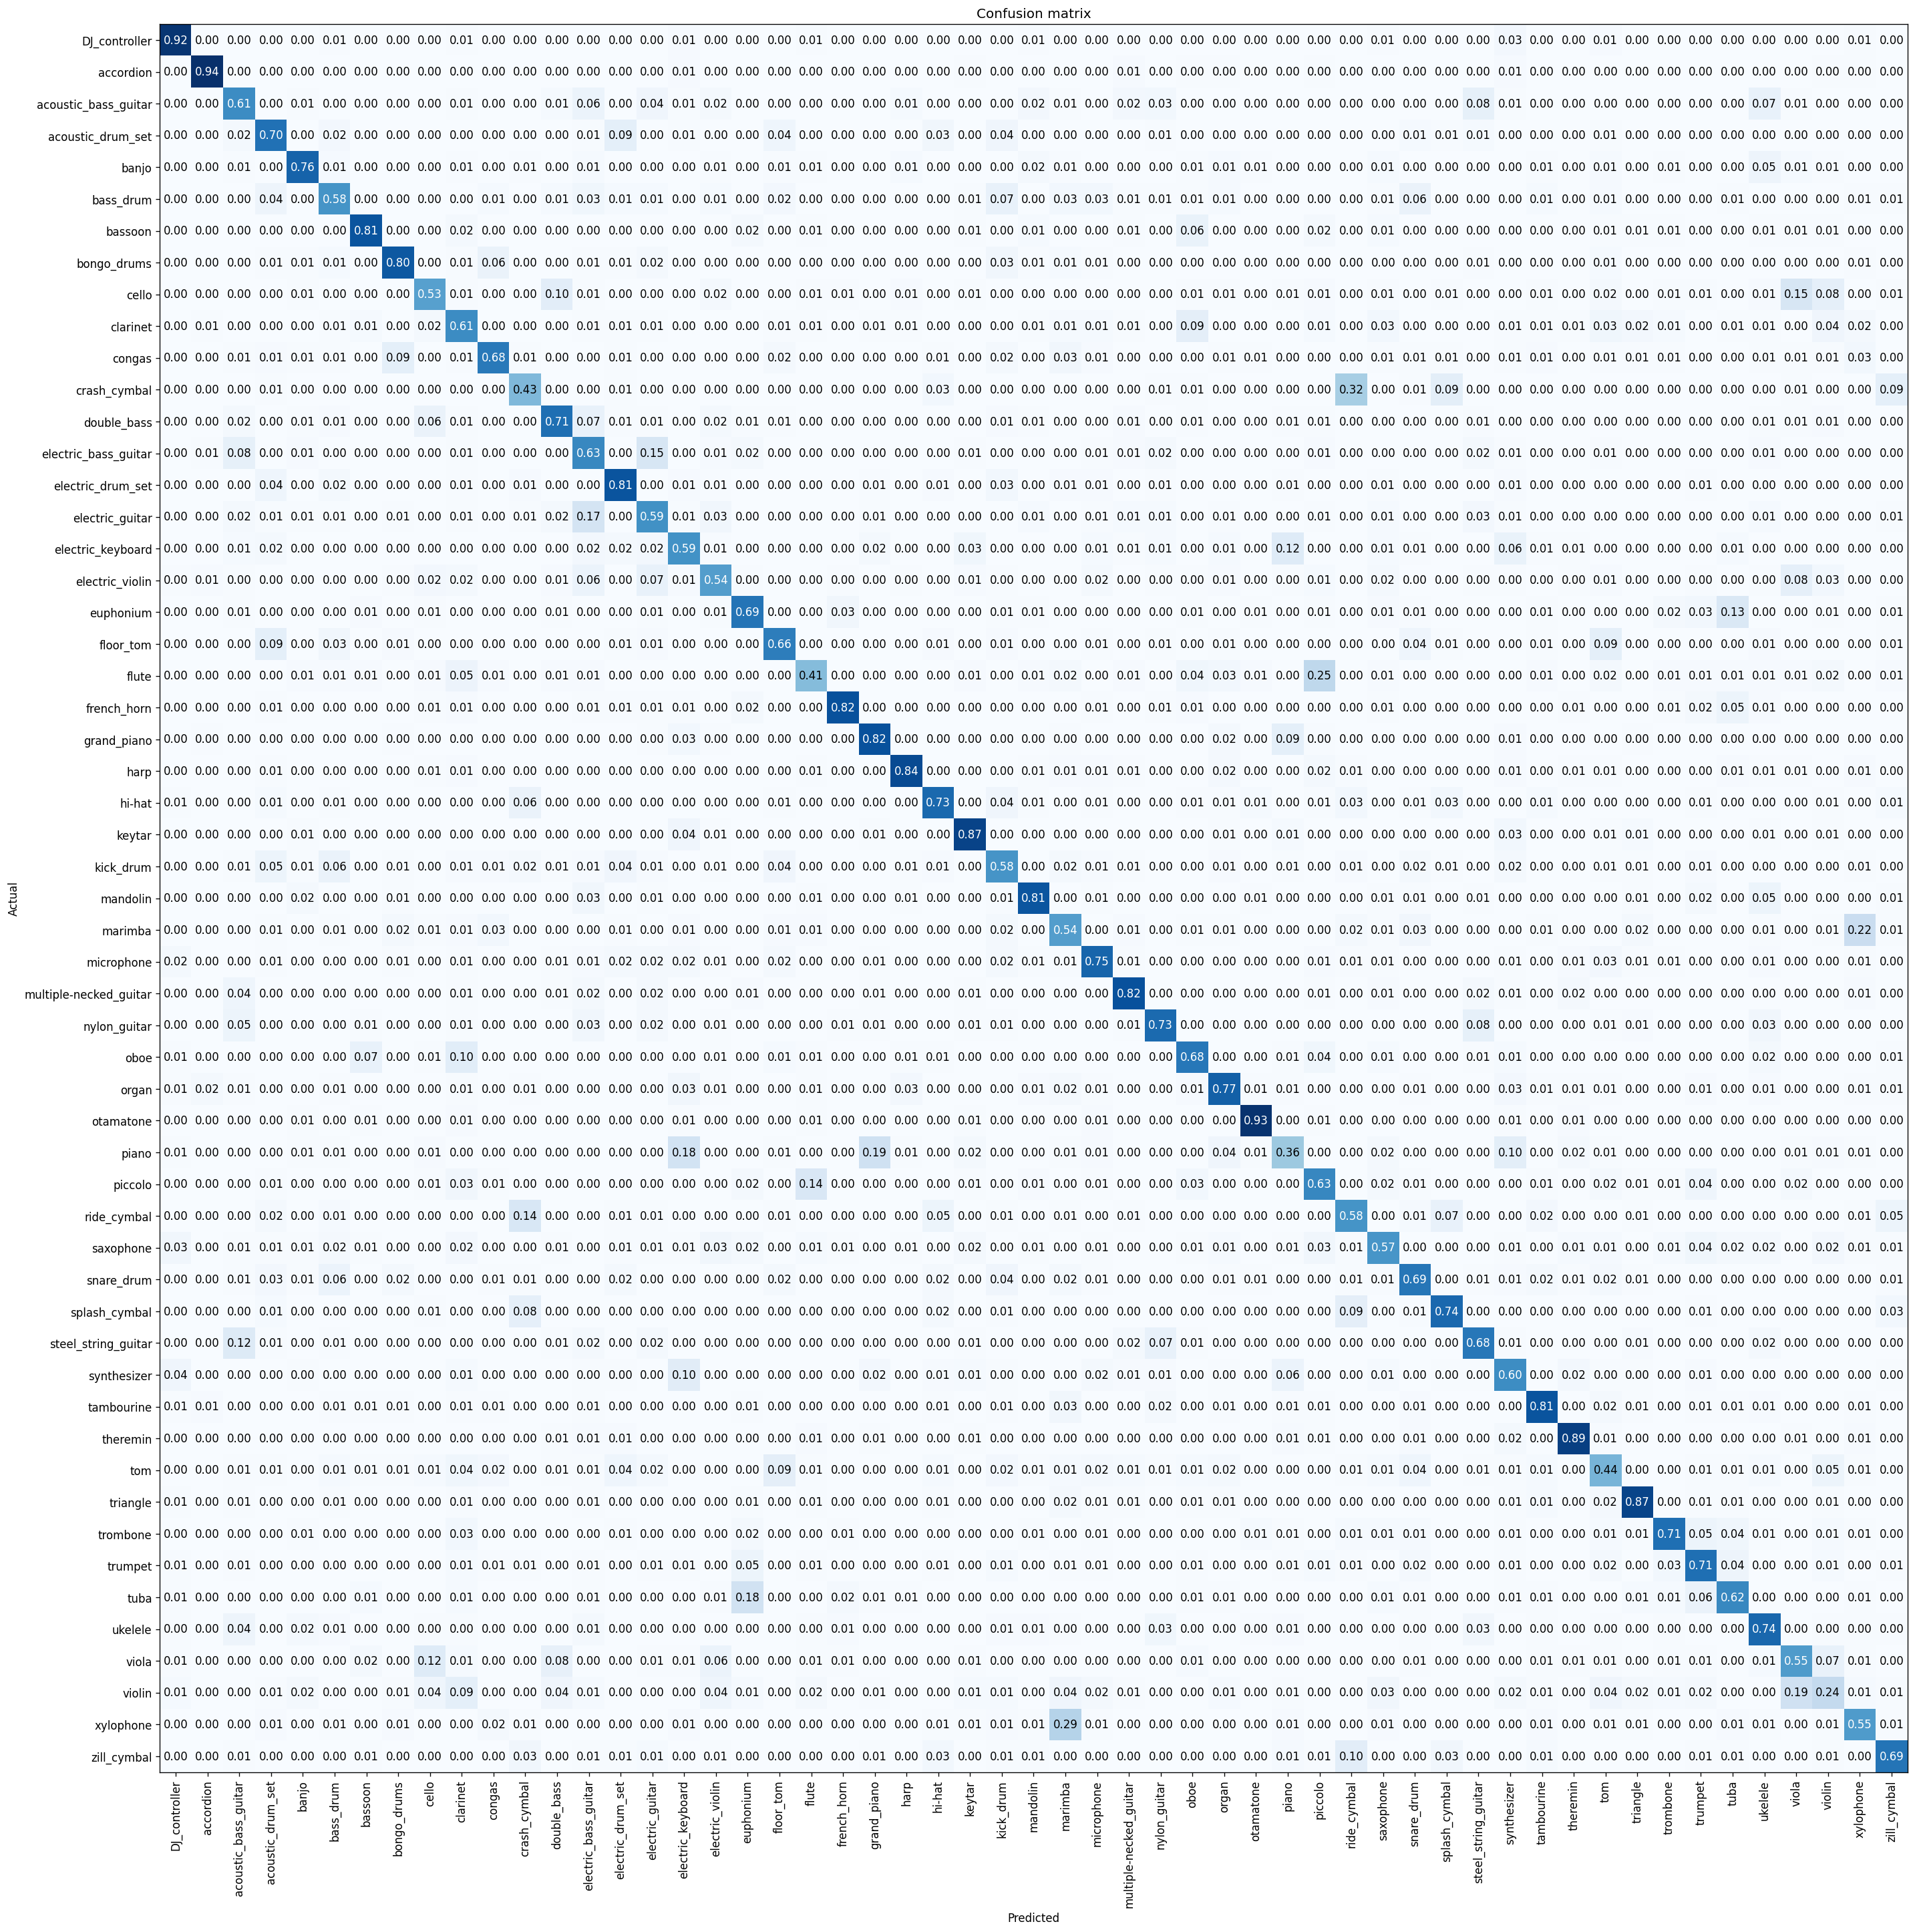

In [ ]:
# Perform confusion matrix analysis to determine the accuracy
# per class, identify confused pairs, and the impact of
# imbalance in classes on the model.
from fastai.interpret import ClassificationInterpretation

# Generate the interpretation object
interp = ClassificationInterpretation.from_learner(learn)

# Plot the normalized confusion matrix
interp.plot_confusion_matrix(figsize=(24,24), dpi=120, normalize=True)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.savefig('confusion_matrix.png')

In [ ]:
interp.most_confused(min_val=10)

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


[('xylophone', 'marimba', np.int64(54)),
 ('crash_cymbal', 'ride_cymbal', np.int64(48)),
 ('marimba', 'xylophone', np.int64(41)),
 ('piano', 'grand_piano', np.int64(38)),
 ('piano', 'electric_keyboard', np.int64(35)),
 ('tuba', 'euphonium', np.int64(33)),
 ('violin', 'viola', np.int64(30)),
 ('cello', 'viola', np.int64(29)),
 ('flute', 'piccolo', np.int64(29)),
 ('electric_bass_guitar', 'electric_guitar', np.int64(28)),
 ('electric_guitar', 'electric_bass_guitar', np.int64(26)),
 ('piccolo', 'flute', np.int64(26)),
 ('ride_cymbal', 'crash_cymbal', np.int64(26)),
 ('euphonium', 'tuba', np.int64(25)),
 ('steel_string_guitar', 'acoustic_bass_guitar', np.int64(23)),
 ('synthesizer', 'electric_keyboard', np.int64(22)),
 ('electric_keyboard', 'piano', np.int64(20)),
 ('viola', 'cello', np.int64(20)),
 ('cello', 'double_bass', np.int64(19)),
 ('piano', 'synthesizer', np.int64(19)),
 ('grand_piano', 'piano', np.int64(18)),
 ('electric_violin', 'viola', np.int64(17)),
 ('oboe', 'clarinet', np.i

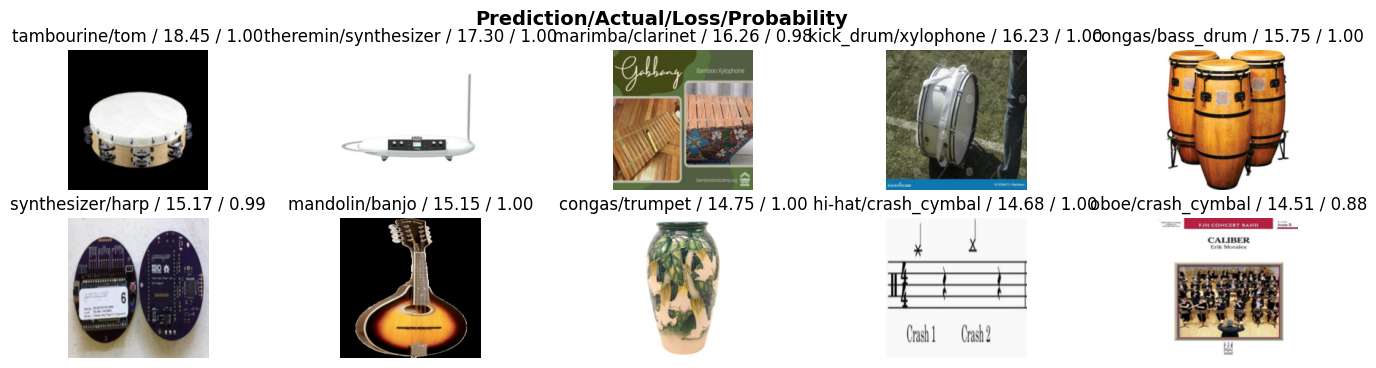

In [ ]:
# Visualize model's top losses
interp.plot_top_losses(10, nrows=2, figsize=(17,4))

In [ ]:
# Export the fine-tuned model
learn.export('musical_instrument_classifier_resnet18.pkl')

In [ ]:
learn.save('stage-1')

Path('models/stage-1.pth')

In [ ]:
# Resume from previous MIC model
# learn = vision_learner(dls, resnet152, metrics=error_rate)
# learn = learn.to_fp16()  # If you were using FP16 earlier
# learn.load('stage-1')
# learn.fine_tune(5)

---
# MIC Model Tester
---
*   Use the drag-and-drop functionality to upload and identify a musical instrument.
*   The model tester will indicate the most likely identification of the instrument and its other possible classification with corresponding probabilities.
---



FileUpload(value={}, accept='.png,.jpg,.jpeg,.webp', description='Upload')

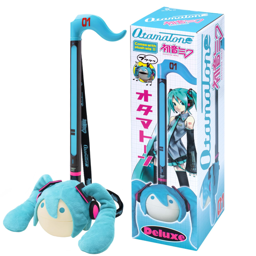

-------------------------------------
This is an otamatone with 100.0% confidence.

Top 3 Predictions:
1. otamatone — 100.0%
-------------------------------------
2. synthesizer — 0.0%
-------------------------------------
3. keytar — 0.0%
-------------------------------------


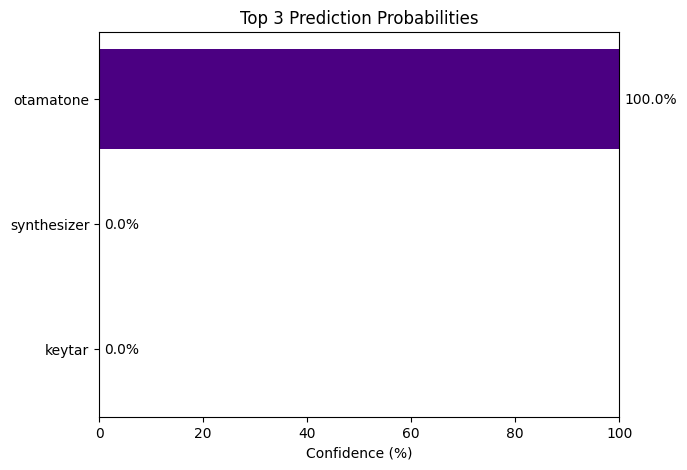

-------------------------------------


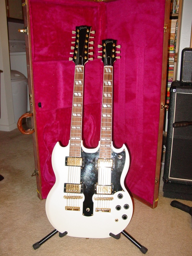

-------------------------------------
This is a multiple-necked guitar with 100.0% confidence.

Top 3 Predictions:
1. multiple-necked guitar — 100.0%
-------------------------------------
2. accordion — 0.0%
-------------------------------------
3. floor tom — 0.0%
-------------------------------------


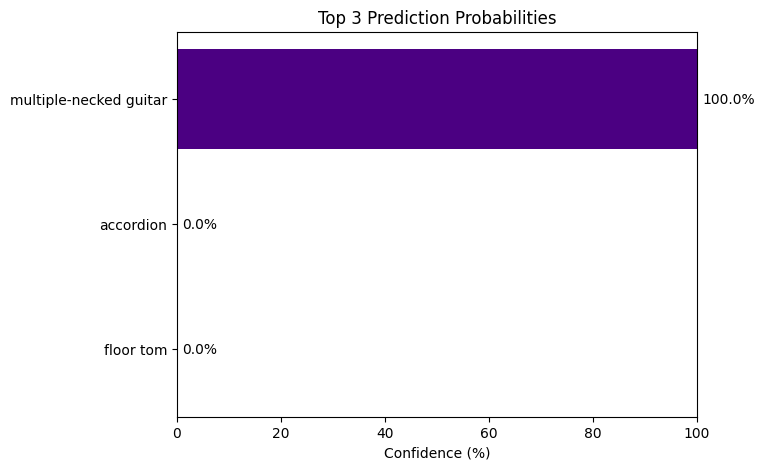

-------------------------------------


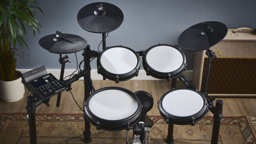

-------------------------------------
This is an electric drum set with 100.0% confidence.

Top 3 Predictions:
1. electric drum set — 100.0%
-------------------------------------
2. acoustic drum set — 0.0%
-------------------------------------
3. kick drum — 0.0%
-------------------------------------


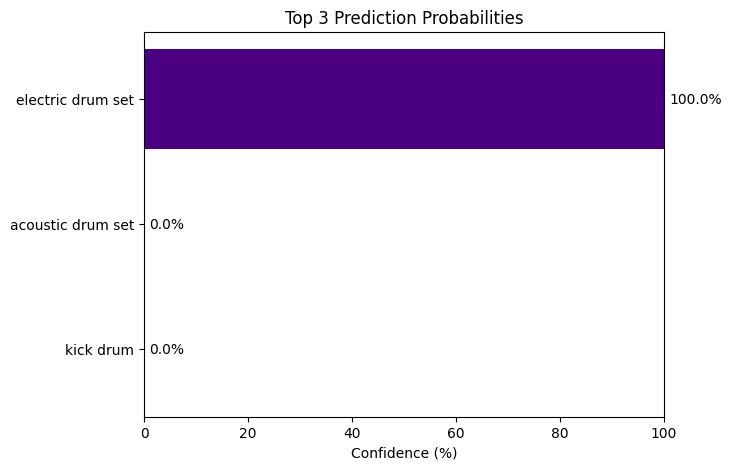

-------------------------------------


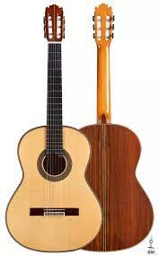

-------------------------------------
This is a nylon guitar with 93.6% confidence.

Top 3 Predictions:
1. nylon guitar — 93.6%
-------------------------------------
2. multiple-necked guitar — 1.8%
-------------------------------------
3. steel string guitar — 1.3%
-------------------------------------


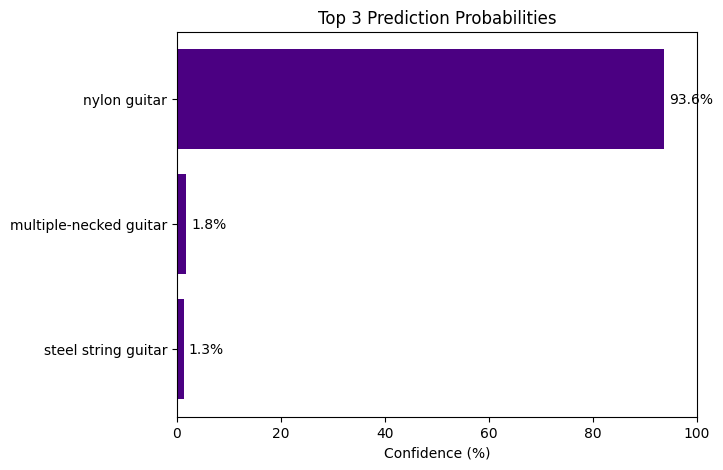

-------------------------------------


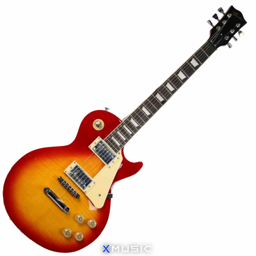

-------------------------------------
This is an electric guitar with 74.4% confidence.

Top 3 Predictions:
1. electric guitar — 74.4%
-------------------------------------
2. electric keyboard — 10.6%
-------------------------------------
3. electric violin — 7.1%
-------------------------------------


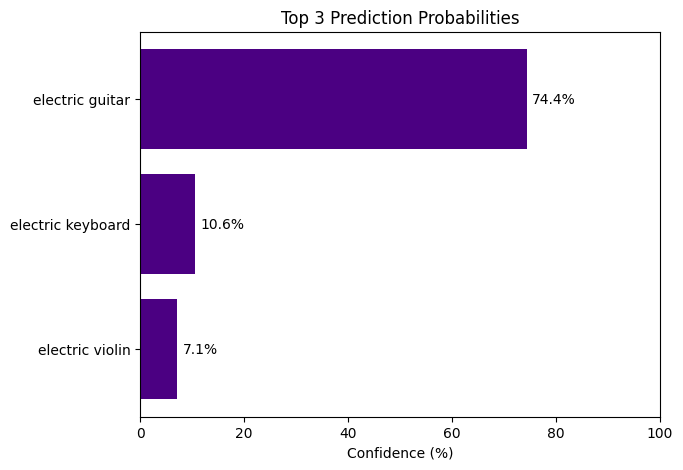

-------------------------------------


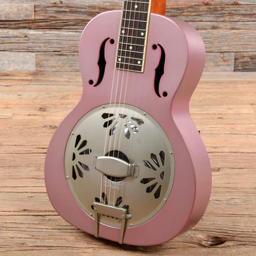

-------------------------------------
This is an acoustic bass guitar with 62.1% confidence.

Top 3 Predictions:
1. acoustic bass guitar — 62.1%
-------------------------------------
2. electric violin — 10.5%
-------------------------------------
3. electric bass guitar — 4.5%
-------------------------------------


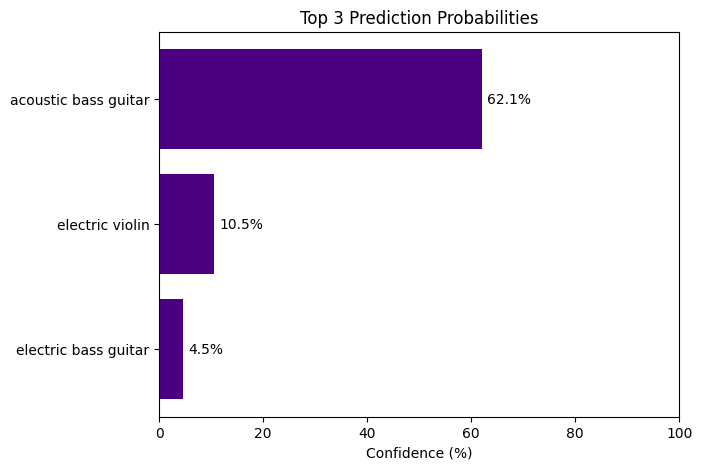

-------------------------------------


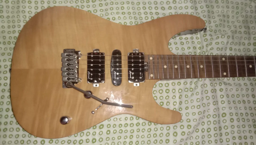

-------------------------------------
This is an electric guitar with 57.9% confidence.

Top 3 Predictions:
1. electric guitar — 57.9%
-------------------------------------
2. electric bass guitar — 32.2%
-------------------------------------
3. acoustic bass guitar — 3.1%
-------------------------------------


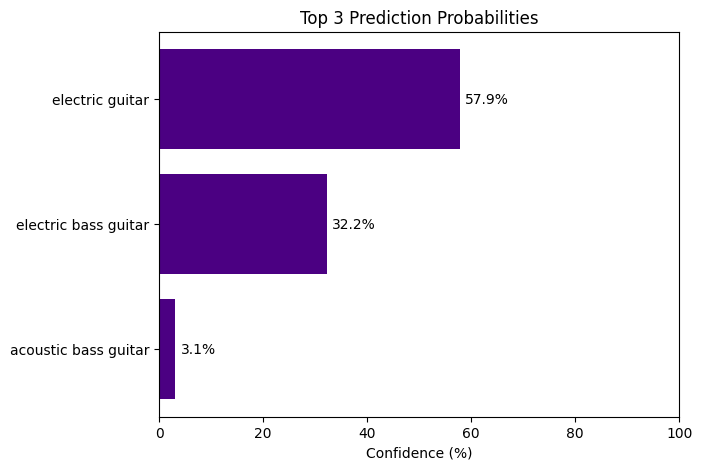

-------------------------------------


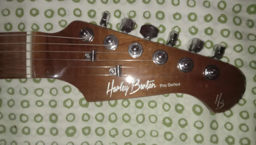

-------------------------------------
This is an electric bass guitar with 49.8% confidence.

Top 3 Predictions:
1. electric bass guitar — 49.8%
-------------------------------------
2. ukelele — 11.5%
-------------------------------------
3. multiple-necked guitar — 7.1%
-------------------------------------


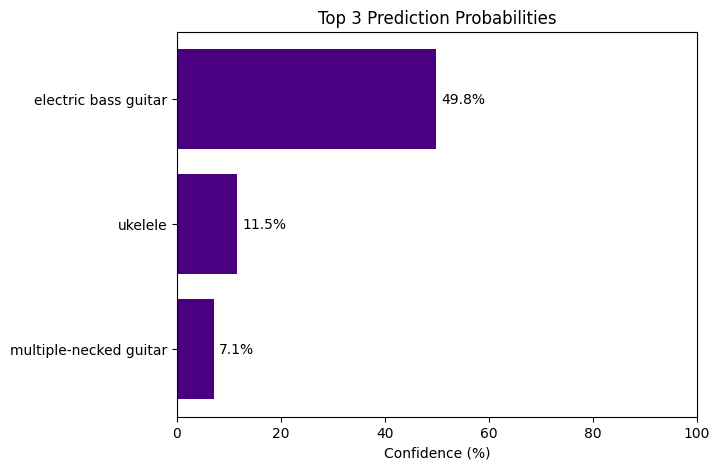

-------------------------------------


In [ ]:
from google.colab import files
import ipywidgets as widgets
from IPython.display import display
from fastai.vision.all import *
import PIL
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="fastai.learner")

# Load the trained MIC model
learn = load_learner('musical_instrument_classifier_resnet18.pkl')

# Upload widget
upload_button = widgets.FileUpload(accept='.png,.jpg,.jpeg,.webp', multiple=False)
display(upload_button)

# Prediction handler
def on_upload(change):
    for fname, file_info in upload_button.value.items():
        # Save uploaded image
        with open(fname, 'wb') as f:
            f.write(file_info['content'])

        # Show image
        display(PIL.Image.open(fname).to_thumb(256, 256))

        # Run prediction
        pred_class, pred_idx, probs = learn.predict(fname)

        # Convert class list and probs to a sorted top-3 list
        classes = learn.dls.vocab
        top_3 = sorted(
                  [(cls, probs[i].item()) for i, cls in enumerate(classes)],
                  key=lambda x: x[1],
                  reverse=True
                )[:3]

        # Display top-1 natural language output
        print("-------------------------------------")
        best_class, best_prob = top_3[0]
        article = 'an' if best_class[0].lower() in 'aeiou' else 'a'
        print(f"This is {article} {best_class.replace('_', ' ')} with {best_prob * 100:.1f}% confidence.")

        # Print top-3 ranked list
        print("\nTop 3 Predictions:")
        for i, (cls, prob) in enumerate(top_3, 1):
            print(f"{i}. {cls.replace('_', ' ')} — {prob * 100:.1f}%")
            print("-------------------------------------")

        # Plot bar chart
        labels = [cls.replace('_', ' ') for cls, _ in top_3]
        values = [prob * 100 for _, prob in top_3]

        plt.figure(figsize=(8, 5))
        bars = plt.barh(labels[::-1], values[::-1], color='indigo')
        plt.xlabel('Confidence (%)')
        plt.title('Top 3 Prediction Probabilities')
        plt.xlim(0, 100)
        for bar, val in zip(bars, values[::-1]):
            plt.text(val + 1, bar.get_y() + bar.get_height()/2, f"{val:.1f}%", va='center')
        plt.subplots_adjust(left=0.3, right=0.95)
        plt.show()
        print("-------------------------------------")

# Attach the event handler
upload_button.observe(on_upload, names='value')